In [113]:
import numpy as np
import pandas as pd

from pandas import DataFrame, Series  
from pandas.tools.plotting import scatter_matrix

import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb

In [3]:
%matplotlib inline
rcParams['figure.figsize'] = 5, 4
sb.set_style('whitegrid')

In [4]:
address = 'Data/Exercise Files/Ch01/01_05/mtcars.csv'
cars = pd.read_csv(address)

cars.columns = ['car_names','mpg','cyl','disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']
cars.head()

,car_names,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [5]:
# object_name.groupby('Series_name')
# ♔┈♔┈♔┈( WHAT THIS DOES )┈♔┈♔┈♔
# To group a  DataFrame by its values in a particular column, call the .groupby() method off of the DataFrame, and then pass
# in the column Series you want the DataFrame to be grouped by.
cars_groups = cars.groupby(cars['cyl'])
cars_groups.mean()

,mpg,disp,hp,drat,wt,qsec,vs,am,gear,carb
cyl,,,,,,,,,,
4,26.663636,105.136364,82.636364,4.070909,2.285727,19.137273,0.909091,0.727273,4.090909,1.545455
6,19.742857,183.314286,122.285714,3.585714,3.117143,17.977143,0.571429,0.428571,3.857143,3.428571
8,15.100000,353.100000,209.214286,3.229286,3.999214,16.772143,0.000000,0.142857,3.285714,3.500000


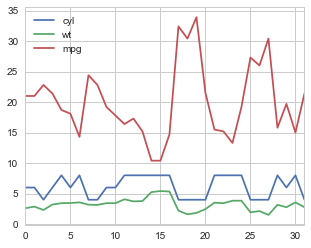

In [6]:
df = cars[['cyl', 'wt', 'mpg']]
df.plot()

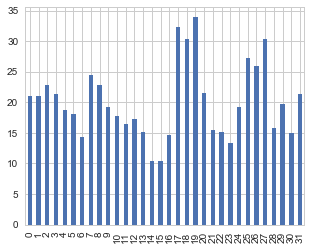

In [7]:
mpg = cars['mpg']
mpg.plot(kind='bar')

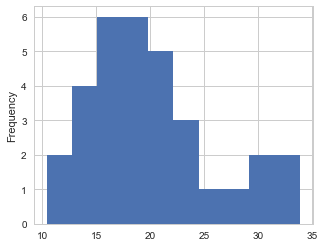

In [8]:
cars.index = cars.car_names
mpg = cars['mpg']
mpg.plot(kind='hist')

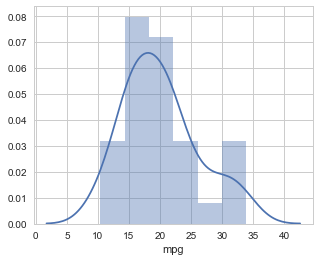

In [9]:
sb.distplot(mpg)

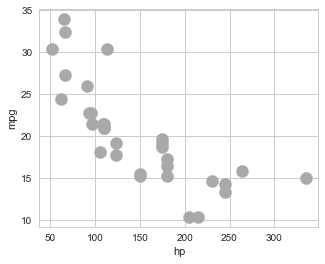

In [10]:
cars.plot(kind='scatter', x='hp', y='mpg', c=['darkgray'], s=150)

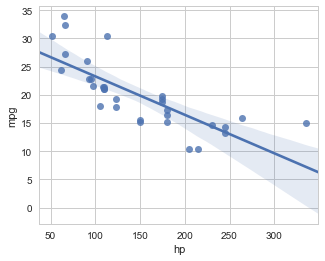

In [11]:
sb.regplot(x='hp', y='mpg', data=cars, scatter=True)

/Users/muhammadhamzajaved/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """Entry point for launching an IPython kernel.


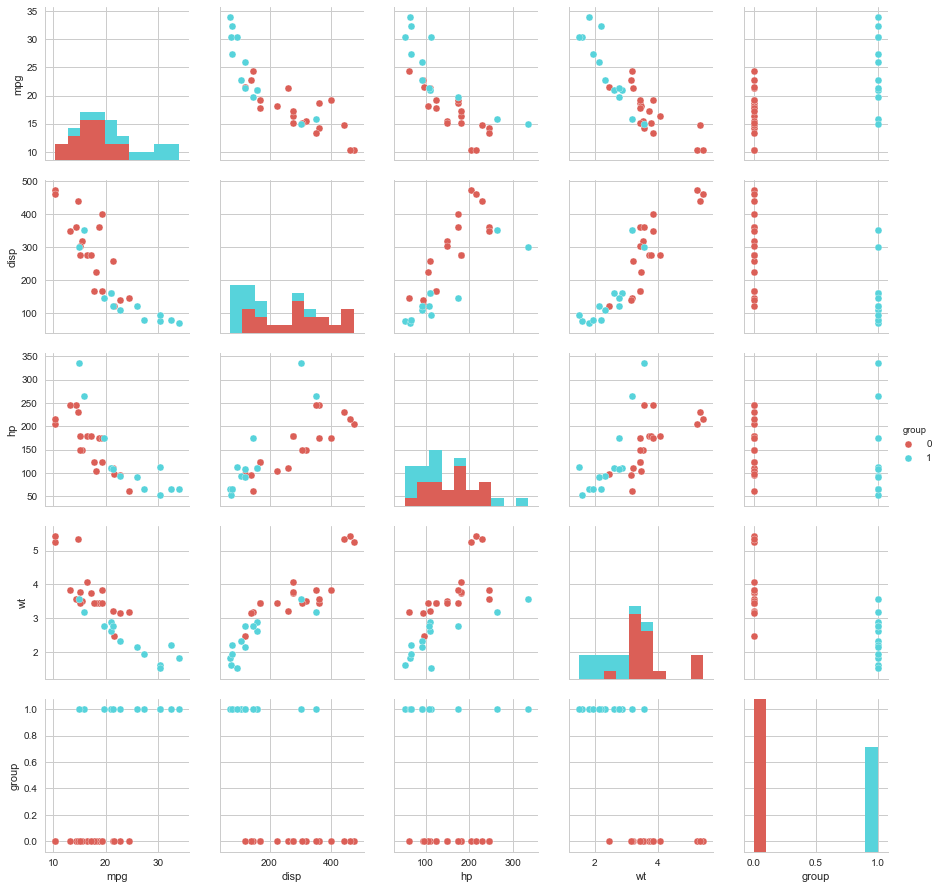

In [12]:
cars_df = pd.DataFrame((cars.ix[:,(1,3,4,6)].values), columns = ['mpg', 'disp', 'hp', 'wt'])
cars_target = cars.ix[:,9].values
target_names = [0, 1]

cars_df['group'] = pd.Series(cars_target, dtype="category")
sb.pairplot(cars_df, hue='group', palette='hls')

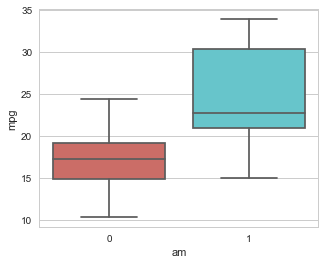

In [13]:
sb.boxplot(x='am', y='mpg', data=cars, palette='hls')

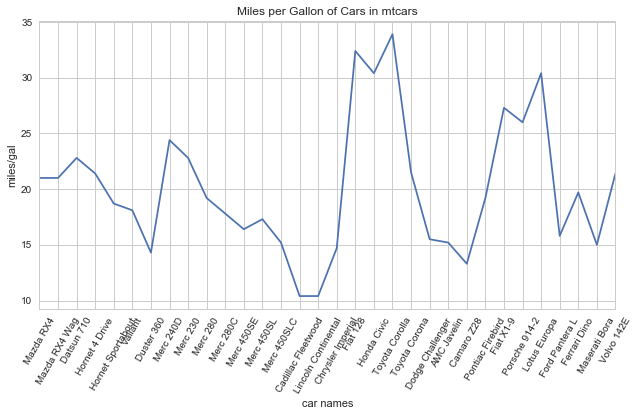

In [14]:
rcParams['figure.figsize'] = 8,4

fig = plt.figure()
ax = fig.add_axes([.1, .1, 1, 1])

mpg.plot()

ax.set_xticks(range(32))

ax.set_xticklabels(cars.car_names, rotation=60, fontsize='medium')
ax.set_title('Miles per Gallon of Cars in mtcars')

ax.set_xlabel('car names')
ax.set_ylabel('miles/gal')

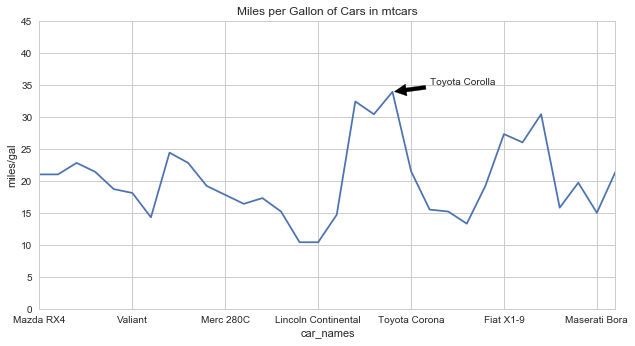

In [15]:
fig = plt.figure()
ax = fig.add_axes([.1,.1,1,1])
mpg.plot()
ax.set_title('Miles per Gallon of Cars in mtcars')
ax.set_ylabel('miles/gal')

ax.set_ylim([0,45])

ax.annotate('Toyota Corolla', xy=(19,33.9), xytext = (21,35),
           arrowprops=dict(facecolor='black', shrink=0.05))

# Chap#3 Categorical Data

In [16]:
#Cross-tabulation - a frequency distribution
import numpy as np
import pandas as pd

In [17]:
cars.head()

,car_names,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
car_names,,,,,,,,,,,,
Mazda RX4,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [18]:
carb = cars.carb
carb.value_counts()

4    10
2    10
1     7
3     3
8     1
6     1
Name: carb, dtype: int64

In [19]:
#Subset for categorical variables
cars_cat =  cars[['cyl','vs','am','gear','carb']]
cars_cat.head()

,cyl,vs,am,gear,carb
car_names,,,,,
Mazda RX4,6,0,1,4,4
Mazda RX4 Wag,6,0,1,4,4
Datsun 710,4,1,1,4,1
Hornet 4 Drive,6,1,0,3,1
Hornet Sportabout,8,0,0,3,2


In [20]:
#Group by gear

gear_group = cars_cat.groupby('gear')
gear_group.describe()

am                                               carb           ...   \
     count      mean       std  min  25%  50%  75%  max count      mean ...    
gear                                                                    ...    
3     15.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  15.0  2.666667 ...    
4     12.0  0.666667  0.492366  0.0  0.0  1.0  1.0  1.0  12.0  2.333333 ...    
5      5.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0   5.0  4.400000 ...    

      cyl         vs                                               
      75%  max count      mean       std  min  25%  50%  75%  max  
gear                                                               
3     8.0  8.0  15.0  0.200000  0.414039  0.0  0.0  0.0  0.0  1.0  
4     6.0  6.0  12.0  0.833333  0.389249  0.0  1.0  1.0  1.0  1.0  
5     8.0  8.0   5.0  0.200000  0.447214  0.0  0.0  0.0  0.0  1.0  

[3 rows x 32 columns]

In [36]:
cars['group'] = pd.Series(cars['gear'])
cars['group'].dtypes

dtype('int64')

In [37]:
cars['group'].value_counts()

3    15
4    12
5     5
Name: group, dtype: int64

In [41]:
pd.crosstab(cars['am'],cars['gear'])

gear,3,4,5
am,,,
0,15,4,0
1,0,8,5


In [42]:
#Parametric Co-relation Analysis

In [55]:
#Pearson Correlation analysis
#Must be normally distributes with a linear relationship

import numpy as np
import pandas as pd

from pandas import DataFrame, Series
from pandas.tools.plotting import scatter_matrix

import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb


import scipy
from scipy.stats.stats import pearsonr
plt.style.use('seaborn-whitegrid')

In [51]:
#The Pearson Correlation

In [54]:
#Loading cars data -csv
cars.head()

,car_names,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,group
car_names,,,,,,,,,,,,,
Mazda RX4,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,4
Mazda RX4 Wag,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,4
Datsun 710,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,4
Hornet 4 Drive,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,3
Hornet Sportabout,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,3


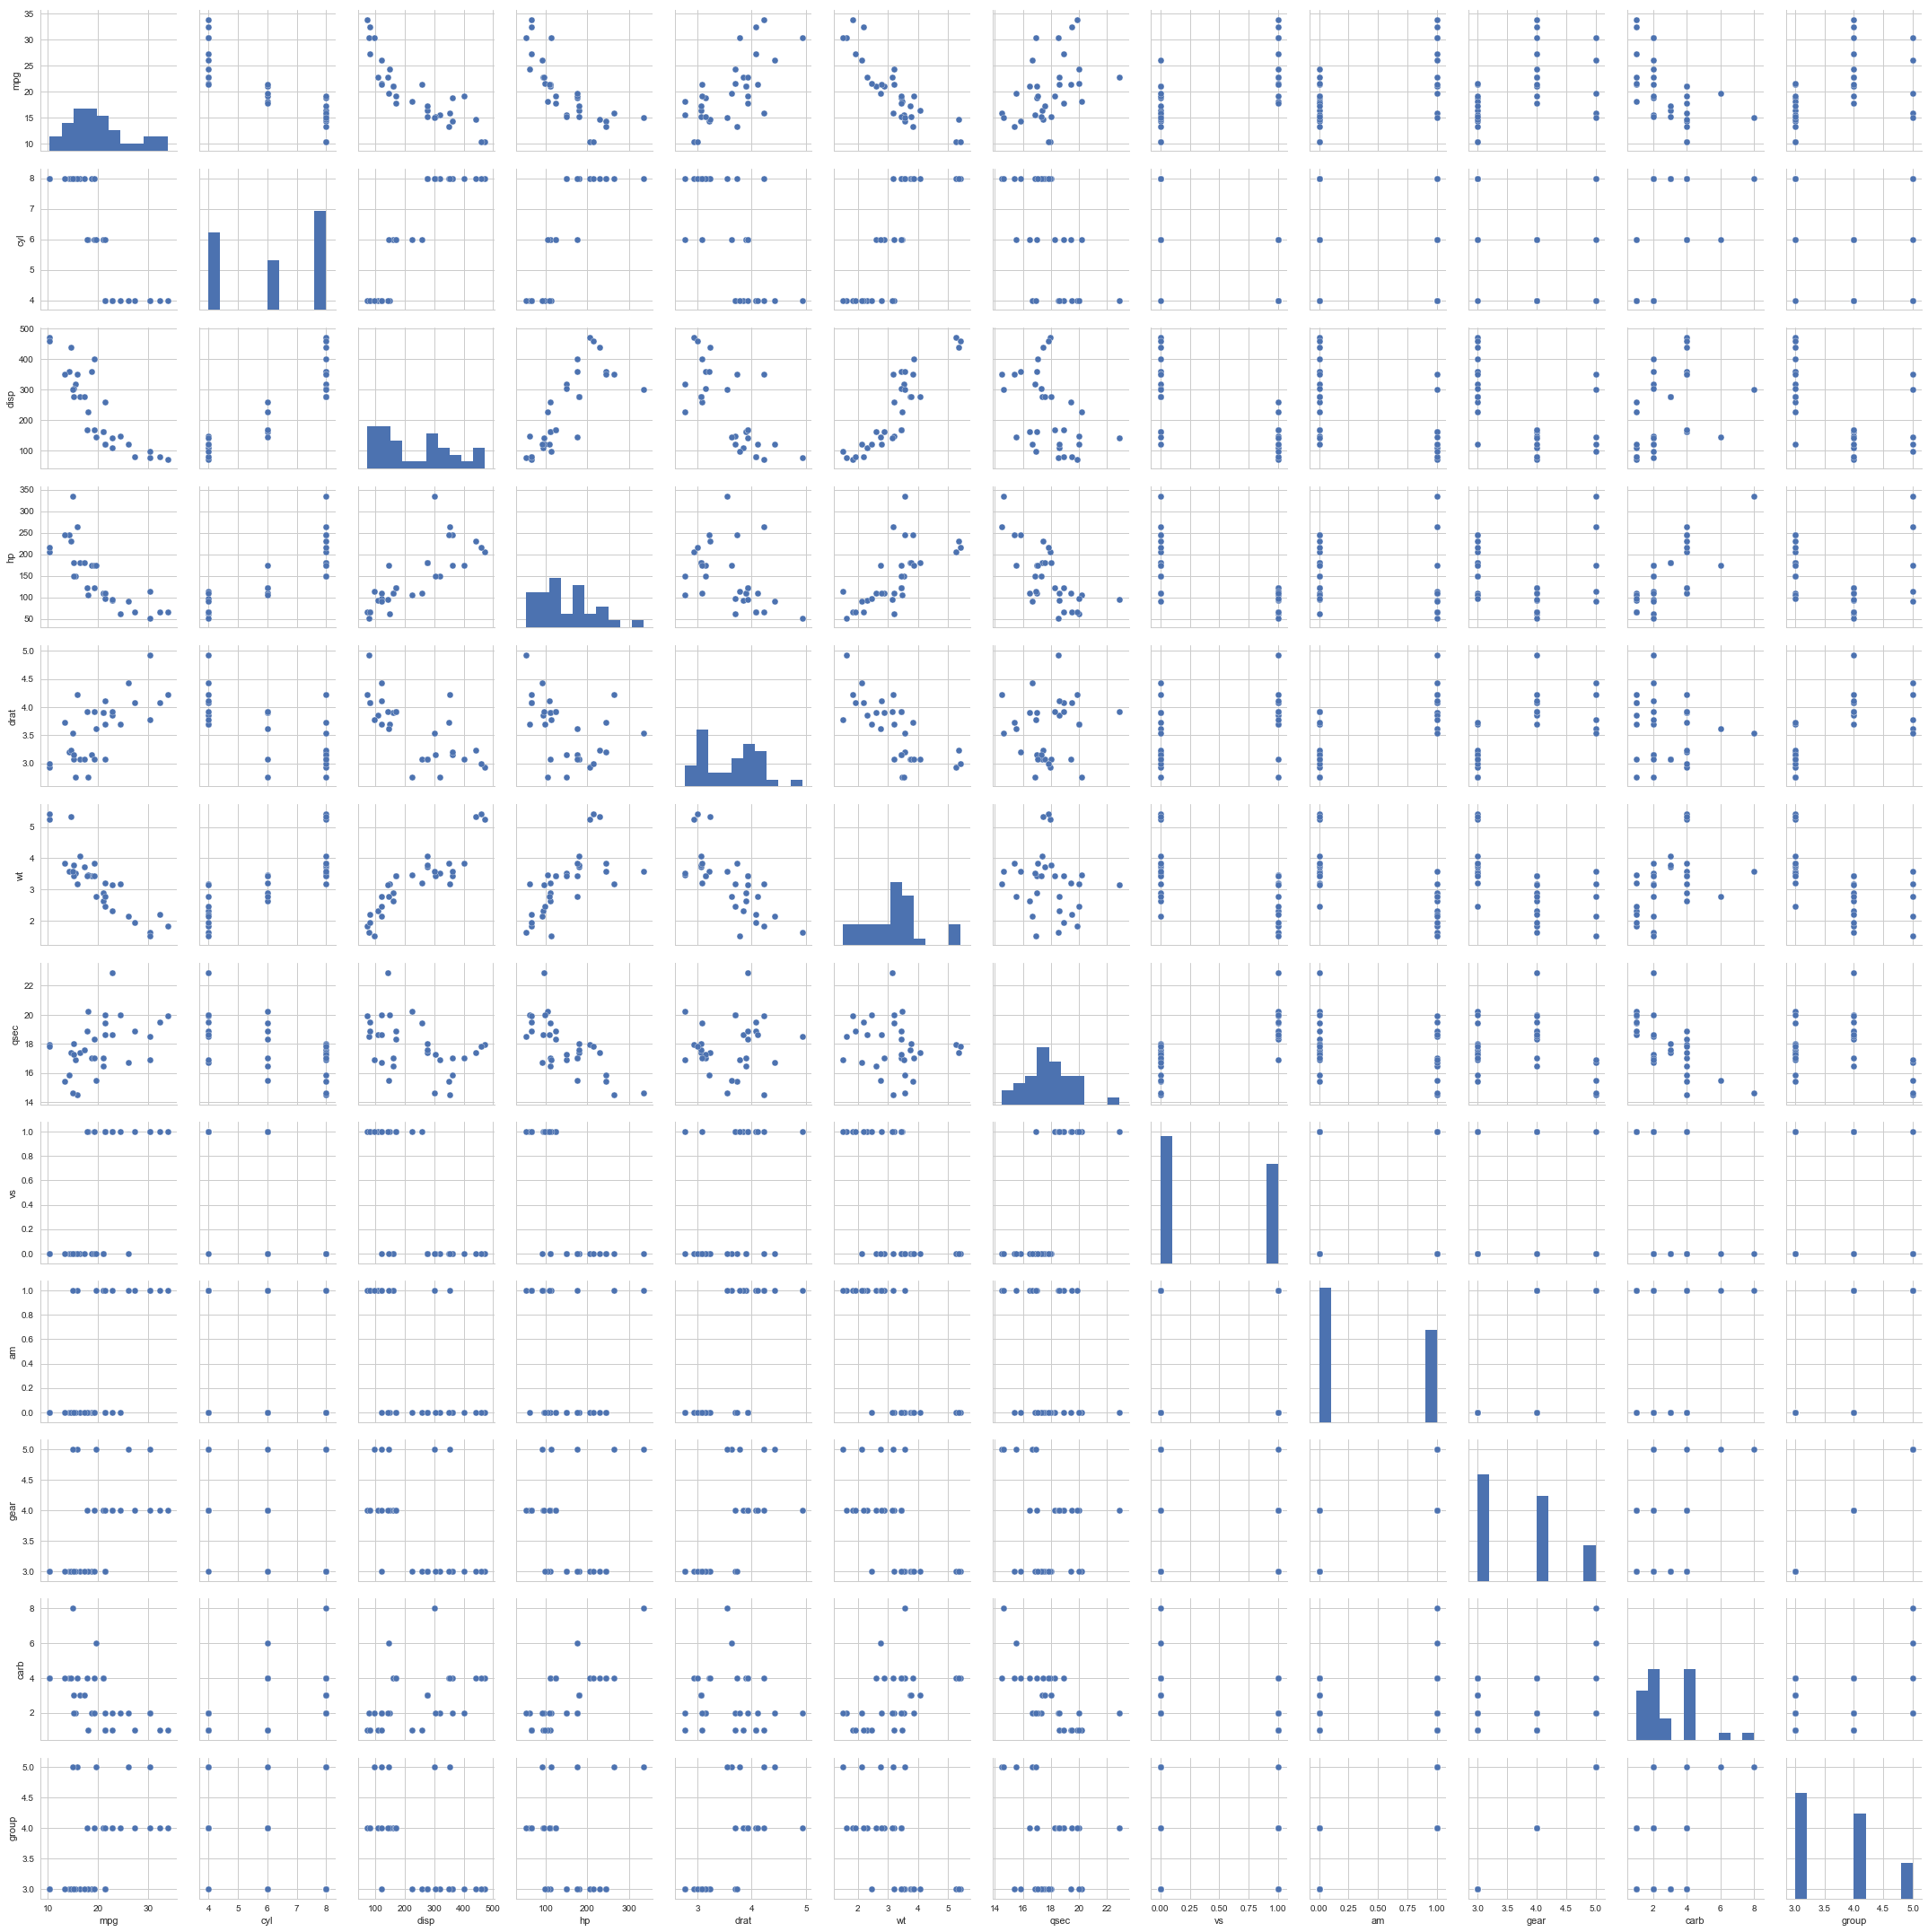

In [56]:
sb.pairplot(cars)

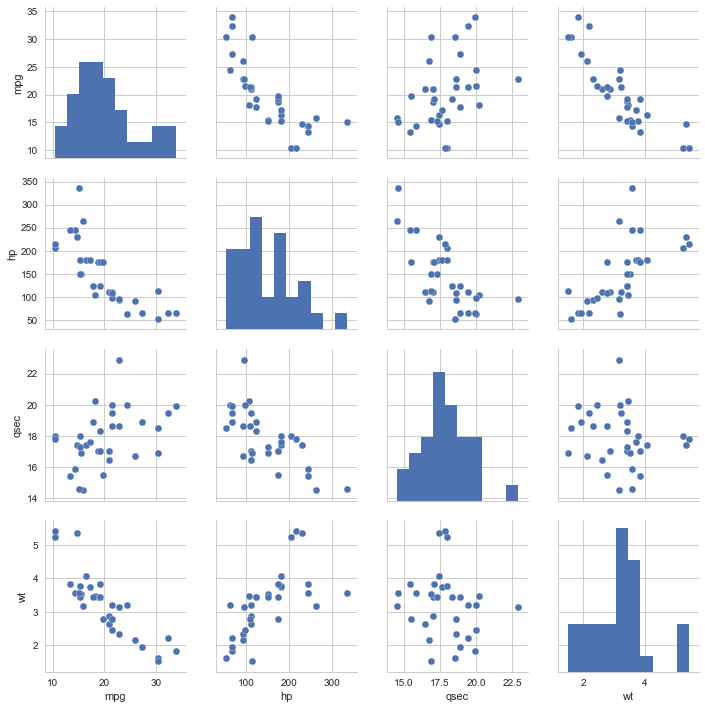

In [58]:
X = cars[['mpg','hp','qsec','wt']]
sb.pairplot(X)

In [63]:
mpg = cars['mpg']
hp = cars['hp']
qsec = cars['qsec']
wt = cars['wt']

pearsonr_coefficient, p_value = pearsonr(mpg, hp)
print(pearsonr_coefficient, p_value)

pearsonr_coefficient, p_value = pearsonr(mpg, qsec)
print(pearsonr_coefficient, p_value)

pearsonr_coefficient, p_value = pearsonr(mpg, wt)
print(pearsonr_coefficient, p_value)

-0.7761683718265864 1.7878352541210664e-07
0.4186840339217782 0.017081988496519575
-0.8676593765172279 1.2939587013504953e-10


In [65]:
#pearson with Pandas
corr = X.corr()
corr

,mpg,hp,qsec,wt
mpg,1.000000,-0.776168,0.418684,-0.867659
hp,-0.776168,1.000000,-0.708223,0.658748
qsec,0.418684,-0.708223,1.000000,-0.174716
wt,-0.867659,0.658748,-0.174716,1.000000


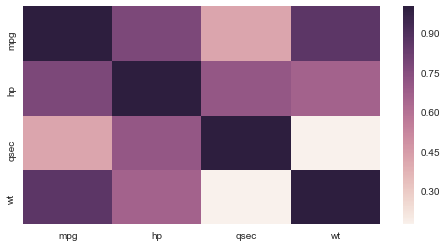

In [70]:
#Seaborn heatmap for correlation
sb.heatmap(abs(corr), 
          xticklabels=corr.columns.values,
          yticklabels=corr.columns.values
          )

In [73]:
#Non parametric Methods for Correlation

#non-linear 
#non-normally distributed
#categorical

#Spearman's rank Correlation: ordinal variable pairs
#R value 1,0,-1

#Chi-square tabled: To test independence

#P < 0.05: Dependent
#P > 0.05: Independent


In [ ]:
#Chapter 3 - 3 Segment: 5

In [74]:
import scipy
from scipy.stats import spearmanr

In [75]:
#cars dataset
cars.head()

,car_names,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,group
car_names,,,,,,,,,,,,,
Mazda RX4,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,4
Mazda RX4 Wag,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,4
Datsun 710,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,4
Hornet 4 Drive,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,3
Hornet Sportabout,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,3


In [ ]:
sb.pairplot(cars)

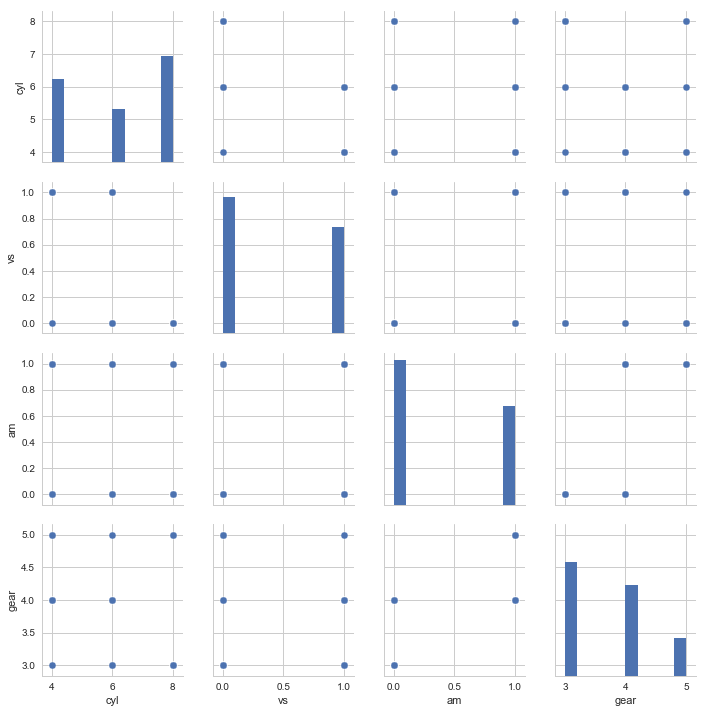

In [76]:
X = cars[['cyl','vs','am','gear']]
# sb.regplot(X)
sb.pairplot(X)

In [80]:
cyl = cars['cyl']
vs = cars['vs']
am = cars['am']
gear = cars['gear']

spearmanr_coefficient, p_value = spearmanr(cyl, vs)
print(spearmanr_coefficient, p_value)
spearmanr_coefficient, p_value = spearmanr(cyl, am)
print(spearmanr_coefficient, p_value)
spearmanr_coefficient, p_value = spearmanr(cyl, gear)
print(spearmanr_coefficient, p_value)




-0.8137889508577582 1.4840576453926875e-08
-0.5220711818077188 0.0021780464381859484
-0.5643104747017164 0.0007678208835711609


In [82]:
corr = X.corr()
corr

,cyl,vs,am,gear
cyl,1.000000,-0.810812,-0.522607,-0.492687
vs,-0.810812,1.000000,0.168345,0.206023
am,-0.522607,0.168345,1.000000,0.794059
gear,-0.492687,0.206023,0.794059,1.000000


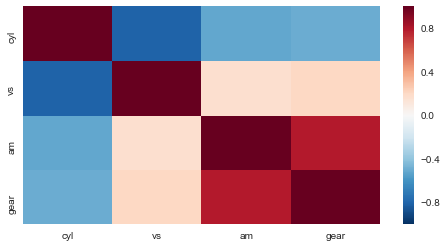

In [86]:
sb.heatmap(corr, xticklabels=corr.columns.values,yticklabels=corr.columns.values)

In [88]:
#Chi-square test for independence
from scipy.stats import chi2_contingency


table = pd.crosstab(cyl, am)
chi2, p, dof, expected = chi2_contingency(table.values)
print(p)

table = pd.crosstab(cyl, vs)
chi2, p, dof, expected = chi2_contingency(table.values)
print(p)

table = pd.crosstab(cyl, gear)
chi2, p, dof, expected = chi2_contingency(table.values)
print(p)



0.012646605046107276
2.3232347637946903e-05
0.0012140660337851554


In [89]:
# Charpter 3 Segment 6
#transforming scaling variables

#normalization and standardization

In [90]:
import numpy as np
import pandas as pd
import scipy

import matplotlib.pyplot as plt
import seaborn as sb
from matplotlib import rcParams

import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import scale

In [92]:
mpg.head()

car_names
Mazda RX4            21.0
Mazda RX4 Wag        21.0
Datsun 710           22.8
Hornet 4 Drive       21.4
Hornet Sportabout    18.7
Name: mpg, dtype: float64

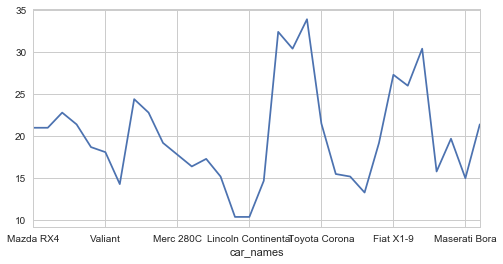

In [94]:
mpg.plot()

In [95]:
mpg.describe()

count    32.000000
mean     20.090625
std       6.026948
min      10.400000
25%      15.425000
50%      19.200000
75%      22.800000
max      33.900000
Name: mpg, dtype: float64

/Users/muhammadhamzajaved/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


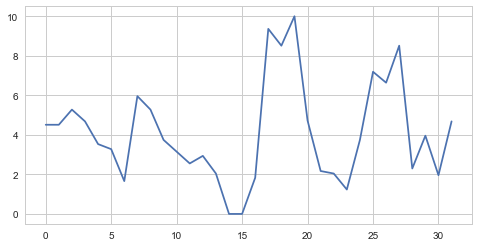

In [108]:
mpg_matrix = mpg.reshape(-1,1)

scaled = preprocessing.MinMaxScaler(feature_range=(0,10))

scaled_mpg = scaled.fit_transform(mpg_matrix)
plt.plot(scaled_mpg)

In [106]:
df = DataFrame(scaled_mpg)
df.describe()

,0
count,32.000000
mean,0.412367
std,0.256466
min,0.000000
25%,0.213830
50%,0.374468
75%,0.527660
max,1.000000


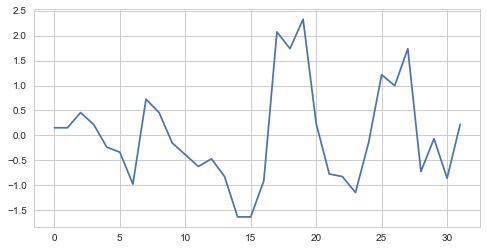

In [111]:
#Standardize

# standardized_mpg = scale(mpg, axis=0, with_mean=False, with_std=False)
standardized_mpg = scale(mpg, axis=0)
plt.plot(standardized_mpg)